# Customer Churn Prediction

## 1. Exploratory Data Analysis (EDA)

#### Import library yang akan digunakan

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

#### Import Dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### Evaluasi Struktur Data

In [3]:
df_train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [4]:
df_test.head()

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [5]:
df_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
df_test.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

#### Cek Null dan NaN

NaN berarti 0/0 Singkatan dari Not a Number NA : secara umum diartikan sebagai nilai yang hilang, tidak ada.
Sedangkan NULL adalah objek kosong.

In [9]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [10]:
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [11]:
df_train.isna().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [12]:
df_test.isna().any()

id                               False
state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
dtype: bool

Dari data yang dimiliki, semua kolom tidak memiliki data null atau NaN

#### Cek Distribusi Variabel Target

no     3652
yes     598
Name: churn, dtype: int64


<AxesSubplot:title={'center':'Churn Counts'}>

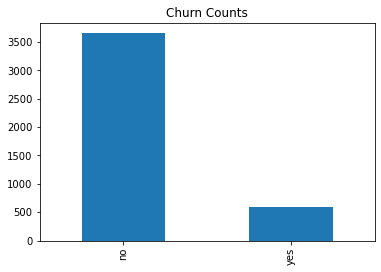

In [13]:
print(df_train['churn'].value_counts())
df_train['churn'].value_counts().plot(kind='bar', title = 'Churn Counts')

Dapat dilihat pada grafik diatas, data churn yang akan menjadi label dalam melakukan klasifikasi memiliki data yang tidak seimbang (imbalanced data)

#### Plot Distribusi Data dan Outliers Pada Data Numerik

In [14]:
df_numeric = df_train.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], axis=1)
#Histogram:
numeric_column_names = list(df_numeric.columns)

C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

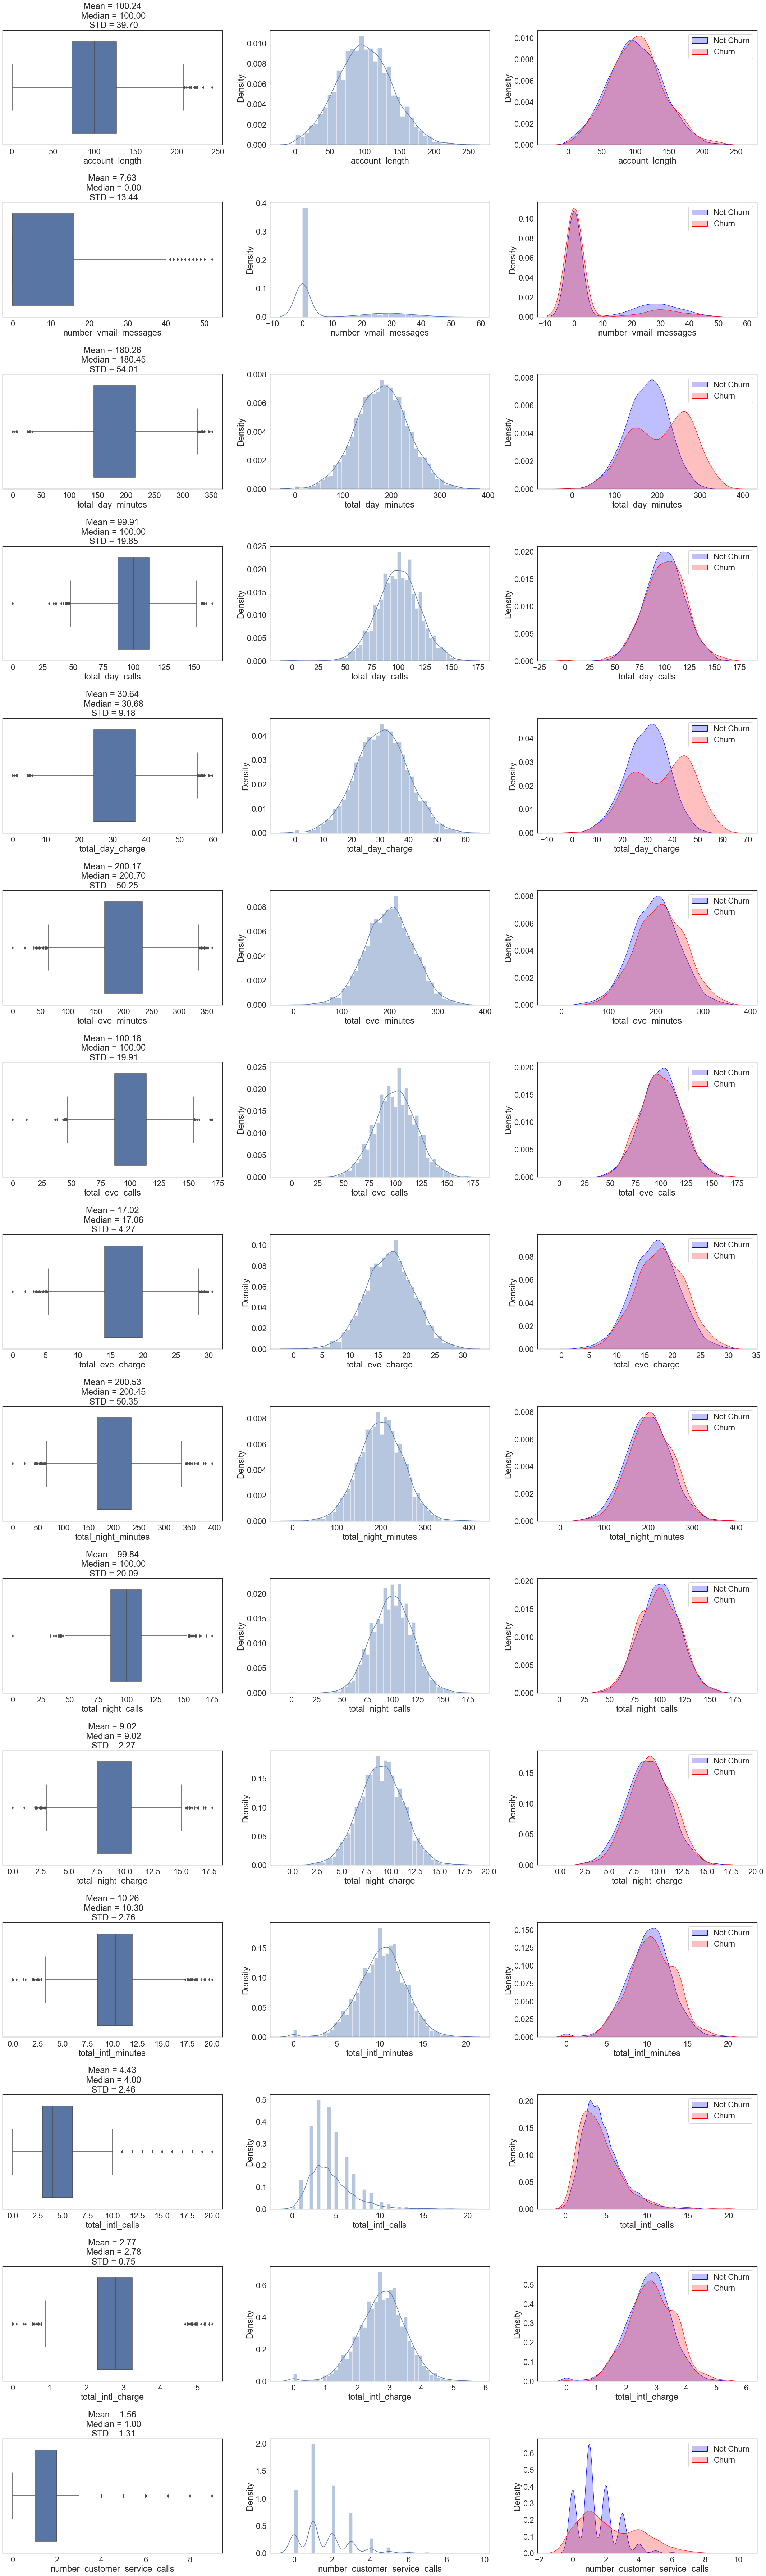

In [15]:
sns.set(style='white', font_scale = 2)
  
def observasi_num(df, features):  
    fig, axs = plt.subplots(len(df_numeric.columns), 3, figsize=(30, 100))
    for i, col in enumerate(features):
        sns.boxplot(df[col], ax = axs[i][0])
        sns.distplot(df[col], ax = axs[i][1])  
        x = sns.kdeplot(df[col][(df['churn'] == 'no')], ax = axs[i][2], color = 'Blue', shade=True) 
        x = sns.kdeplot(df[col][(df['churn'] == 'yes')], ax = axs[i][2], color = 'Red', shade=True) 
        x.legend(['Not Churn', 'Churn'], loc = 'upper right')
        axs[i][0].set_title('Mean = %.2f\n Median = %.2f\n STD = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  

observasi_num(df_train, numeric_column_names)

Dapat dilihat pada visualisasi diatas bahwa terdapat outliers pada setiap kolom data numerik. Jadi outlier tersebut akan coba dihapus karena dapat menyebabkan varians data menjadi lebih besar, interval data dan range menjadi lebar, mean tidak dapat menunjukkan nilai yang sebenarnya (bias), dan pada beberapa analisa data, outlier dapat menyebabkan kesalahan dalam pengambilan keputusan dan kesimpulan.

#### Distribusi Data Kategorikal

In [16]:
df_categorical = df_train[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']]
categorical_column_names = list(df_categorical.columns)
df_categorical

state      area_code international_plan voice_mail_plan churn
0       OH  area_code_415                 no             yes    no
1       NJ  area_code_415                 no              no    no
2       OH  area_code_408                yes              no    no
3       OK  area_code_415                yes              no    no
4       MA  area_code_510                 no             yes    no
...    ...            ...                ...             ...   ...
4245    MT  area_code_415                 no              no    no
4246    WV  area_code_408                 no              no    no
4247    NC  area_code_408                 no              no    no
4248    HI  area_code_408                 no             yes    no
4249    VT  area_code_415                 no             yes    no

[4250 rows x 5 columns]

In [17]:
categorical_column_names

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [18]:
df_categorical.isnull().sum()

state                 0
area_code             0
international_plan    0
voice_mail_plan       0
churn                 0
dtype: int64

In [19]:
binary_churn = {'no': 0, 'yes' : 1}
df_categorical['churn'] = df_categorical['churn'].map(binary_churn)

C:\Users\laode\AppData\Local\Temp\ipykernel_38156\3745283248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['churn'] = df_categorical['churn'].map(binary_churn)


In [20]:
df_categorical.head()

state      area_code international_plan voice_mail_plan  churn
0    OH  area_code_415                 no             yes      0
1    NJ  area_code_415                 no              no      0
2    OH  area_code_408                yes              no      0
3    OK  area_code_415                yes              no      0
4    MA  area_code_510                 no             yes      0

##### 1. Distribusi data Churn Pada Tiap State

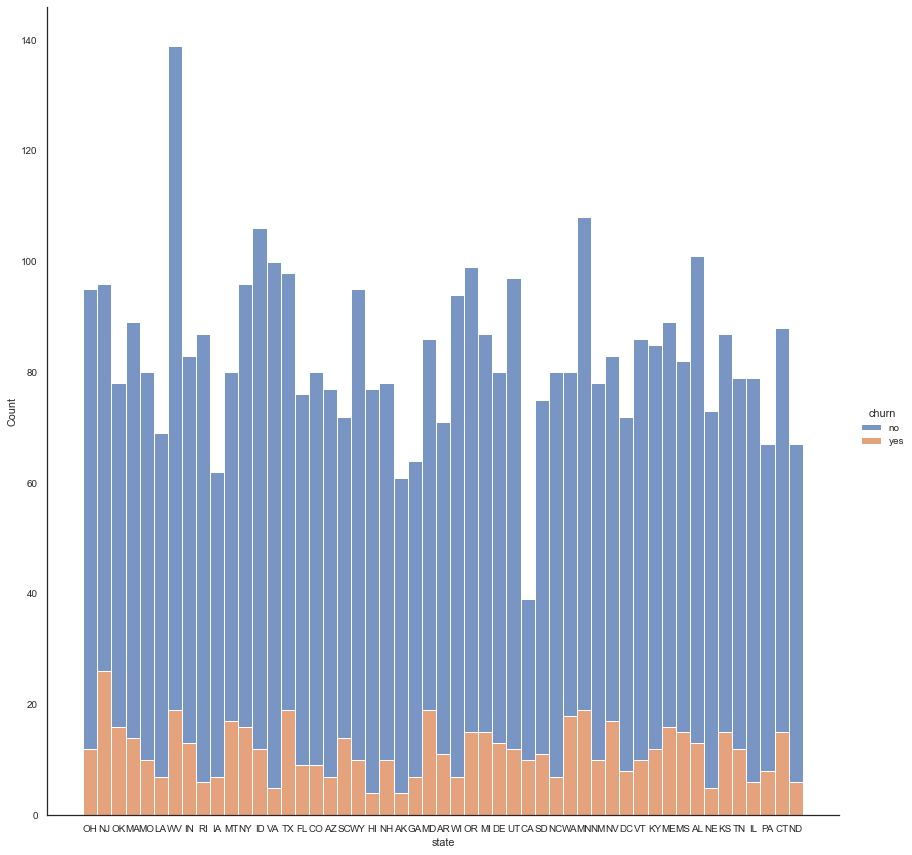

In [21]:
sns.set(style='white', font_scale = 0.9)
sns.displot(x='state', hue='churn', data=df_train[categorical_column_names], multiple = 'stack', height=12)

##### 2. Distribusi data Churn Pada Kode Area

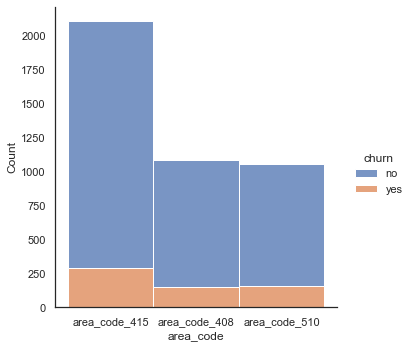

In [22]:
sns.set(style='white', font_scale = 1)
sns.displot(x='area_code', hue='churn', data=df_train[categorical_column_names], multiple = 'stack', height=5)

##### 3. Distribusi data Churn Pada Data International Plan

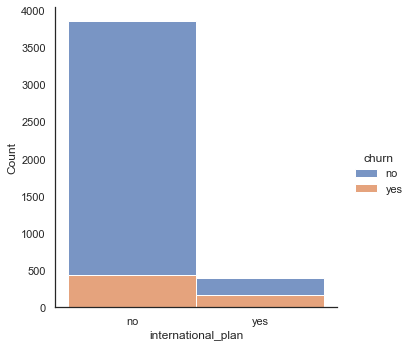

In [23]:
graph = sns.displot(x='international_plan', hue='churn', data=df_train[categorical_column_names], multiple = 'stack')


##### 4. Distribusi data Churn Pada Data Voice Mail Plan

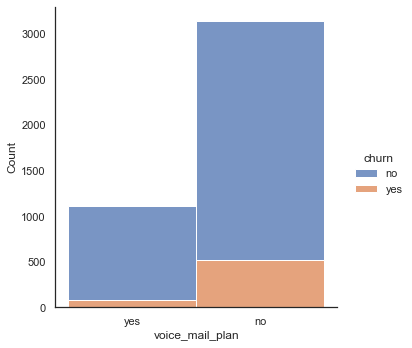

In [24]:
sns.displot(x='voice_mail_plan', hue='churn', data=df_train[categorical_column_names], multiple = 'stack')

# 2. Data Preprocessing

### Delete Outliers

#### Using IQR

In [25]:
from scipy import stats

In [26]:
df_numeric.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [27]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in numeric_column_names:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_cleaned = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cleaned)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

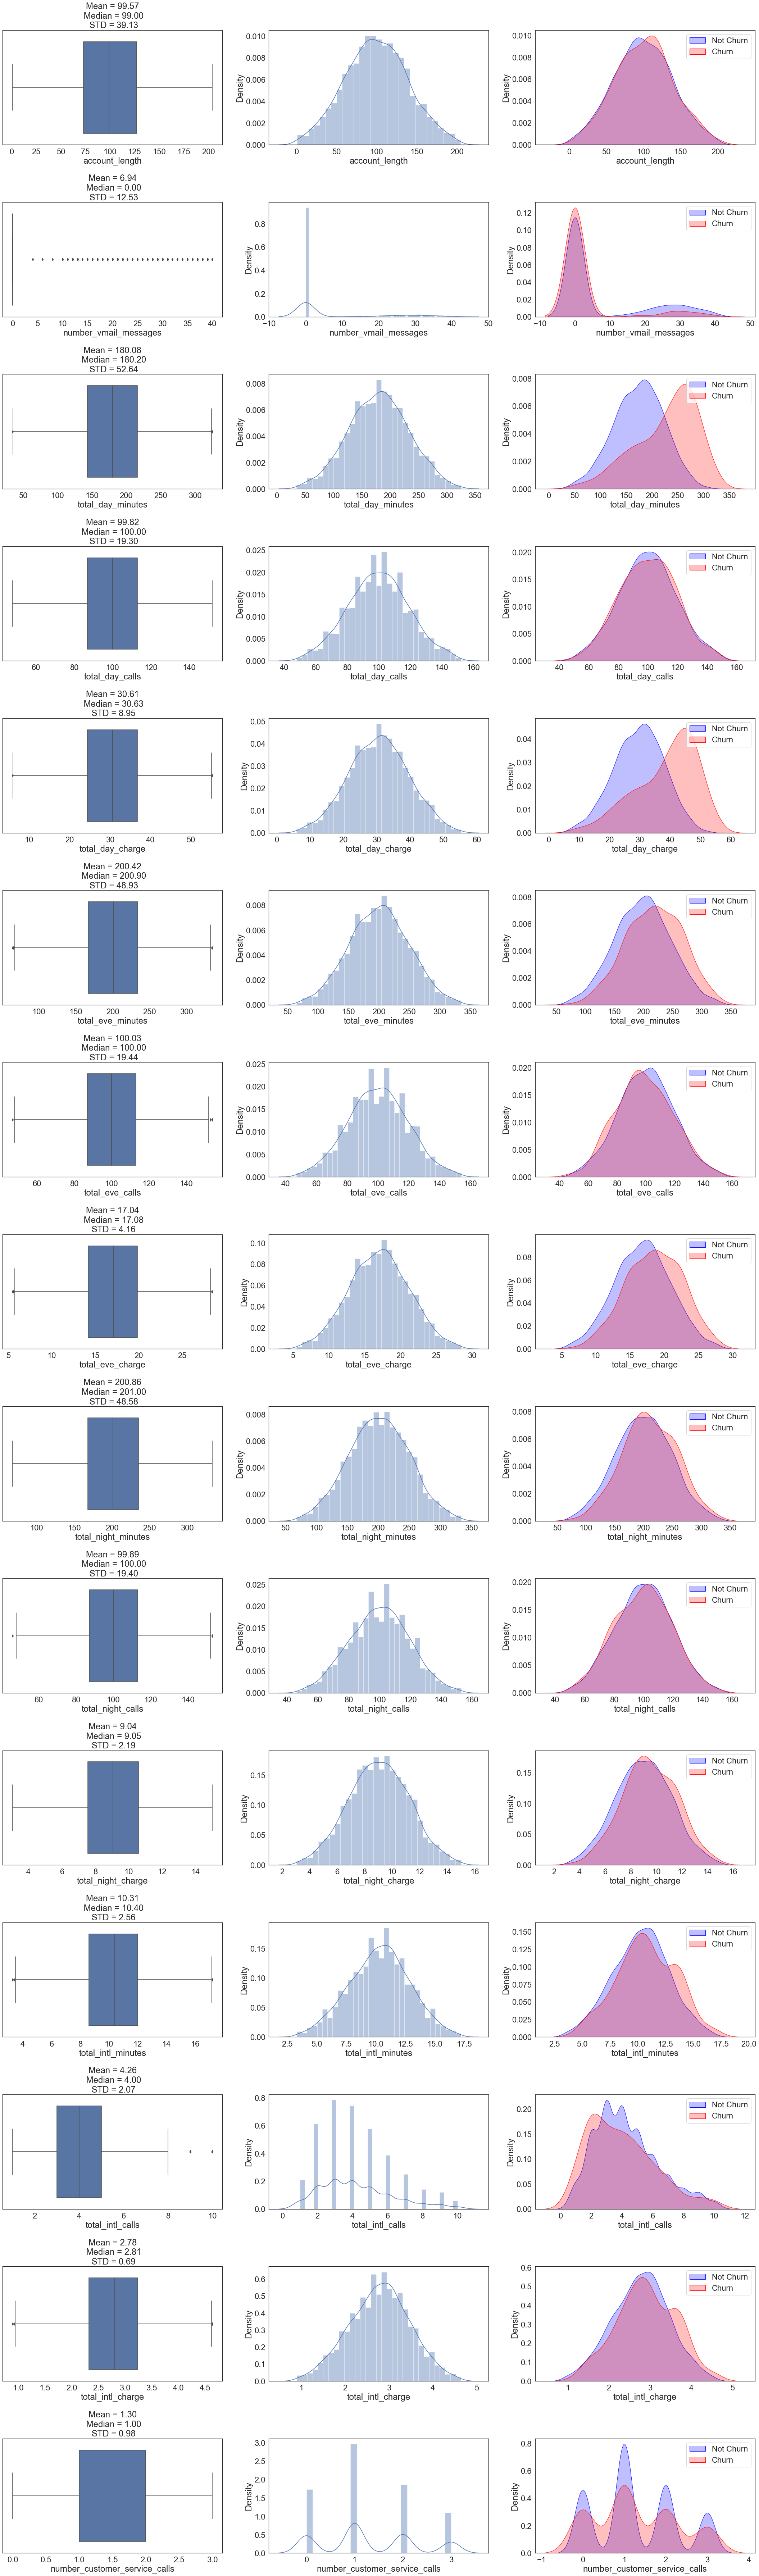

In [28]:
sns.set(style='white', font_scale = 2)
  
def observasi_num(df, features):  
    fig, axs = plt.subplots(len(df_numeric.columns), 3, figsize=(30, 100))
    for i, col in enumerate(features):
        sns.boxplot(df[col], ax = axs[i][0])
        sns.distplot(df[col], ax = axs[i][1])  
        x = sns.kdeplot(df[col][(df['churn'] == 'no')], ax = axs[i][2], color = 'Blue', shade=True) 
        x = sns.kdeplot(df[col][(df['churn'] == 'yes')], ax = axs[i][2], color = 'Red', shade=True) 
        x.legend(['Not Churn', 'Churn'], loc = 'upper right')
        axs[i][0].set_title('Mean = %.2f\n Median = %.2f\n STD = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  

observasi_num(df_cleaned, numeric_column_names)

Berdasarkan hasil visualisasi outlier menggunakan boxplot, dapat dilihat bahwa pada kolom 'number_vmail_messages' masih terdapat banyak outlier. Jadi, kita coba mengahapus lagi outlier pada kolom tersebut.

In [29]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cleaned)}')

filtered_entries = np.array([True] * len(df_cleaned))
for col in ['number_vmail_messages']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_cleaned[col] >= low_limit) & (df_cleaned[col] <= high_limit)) & filtered_entries
    
df_cleaned = df_cleaned[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cleaned)}')

Jumlah baris sebelum memfilter outlier: 3515
Jumlah baris setelah memfilter outlier: 2641


C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

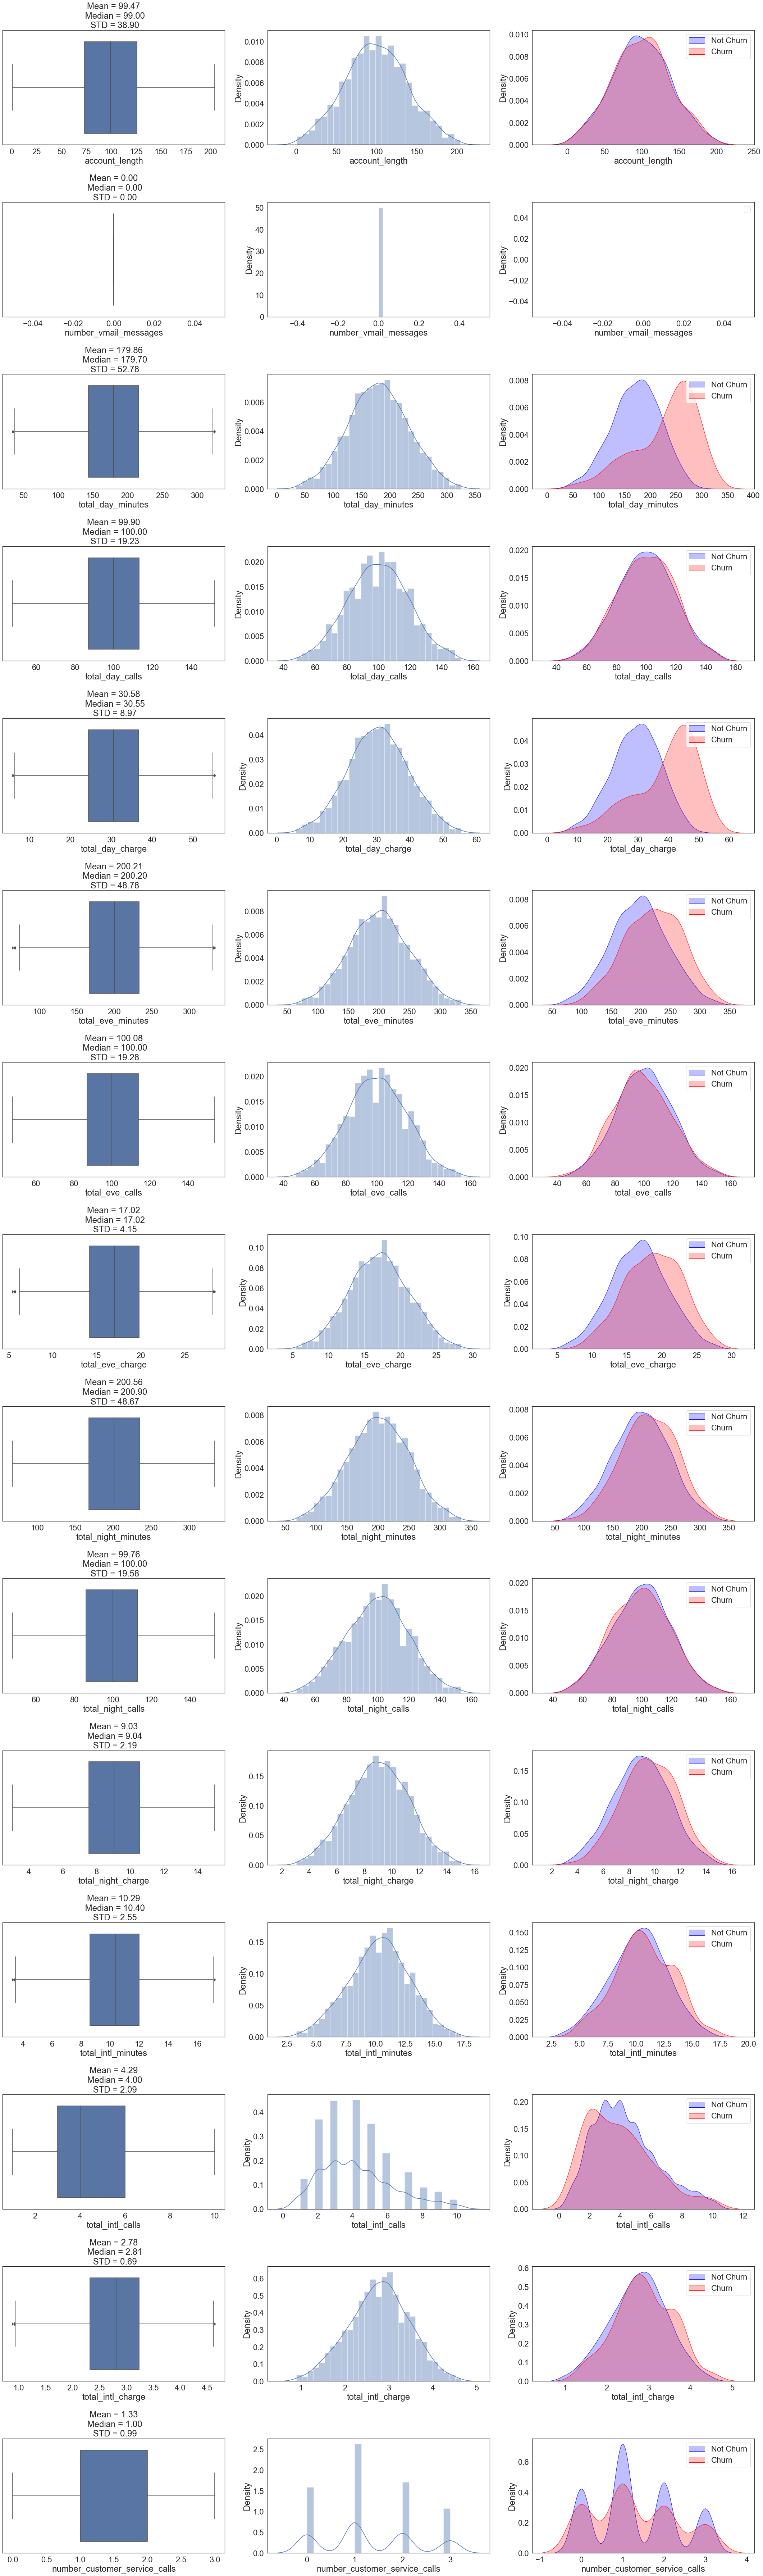

In [30]:
sns.set(style='white', font_scale = 2)
  
def observasi_num(df, features):  
    fig, axs = plt.subplots(len(df_numeric.columns), 3, figsize=(30, 100))
    for i, col in enumerate(features):
        sns.boxplot(df[col], ax = axs[i][0])
        sns.distplot(df[col], ax = axs[i][1])  
        x = sns.kdeplot(df[col][(df['churn'] == 'no')], ax = axs[i][2], color = 'Blue', shade=True) 
        x = sns.kdeplot(df[col][(df['churn'] == 'yes')], ax = axs[i][2], color = 'Red', shade=True) 
        x.legend(['Not Churn', 'Churn'], loc = 'upper right')
        axs[i][0].set_title('Mean = %.2f\n Median = %.2f\n STD = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  

observasi_num(df_cleaned, numeric_column_names)

Berdasarkan visualisasi diatas, dapat dilihat masih terdapat sedikit outlier pada kolom total_day_minutes, total_day_charge, total_eve_minutes, total_eve_charge, total_intl_minutes, total_intl_charge. Jadi coba kita lakukan penghapusan outlier lagi pada data tersebut.

In [31]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cleaned)}')

filtered_entries = np.array([True] * len(df_cleaned))
for col in numeric_column_names[2:]:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_cleaned[col] >= low_limit) & (df_cleaned[col] <= high_limit)) & filtered_entries
    
df_cleaned = df_cleaned[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cleaned)}')

Jumlah baris sebelum memfilter outlier: 2641
Jumlah baris setelah memfilter outlier: 2626


C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

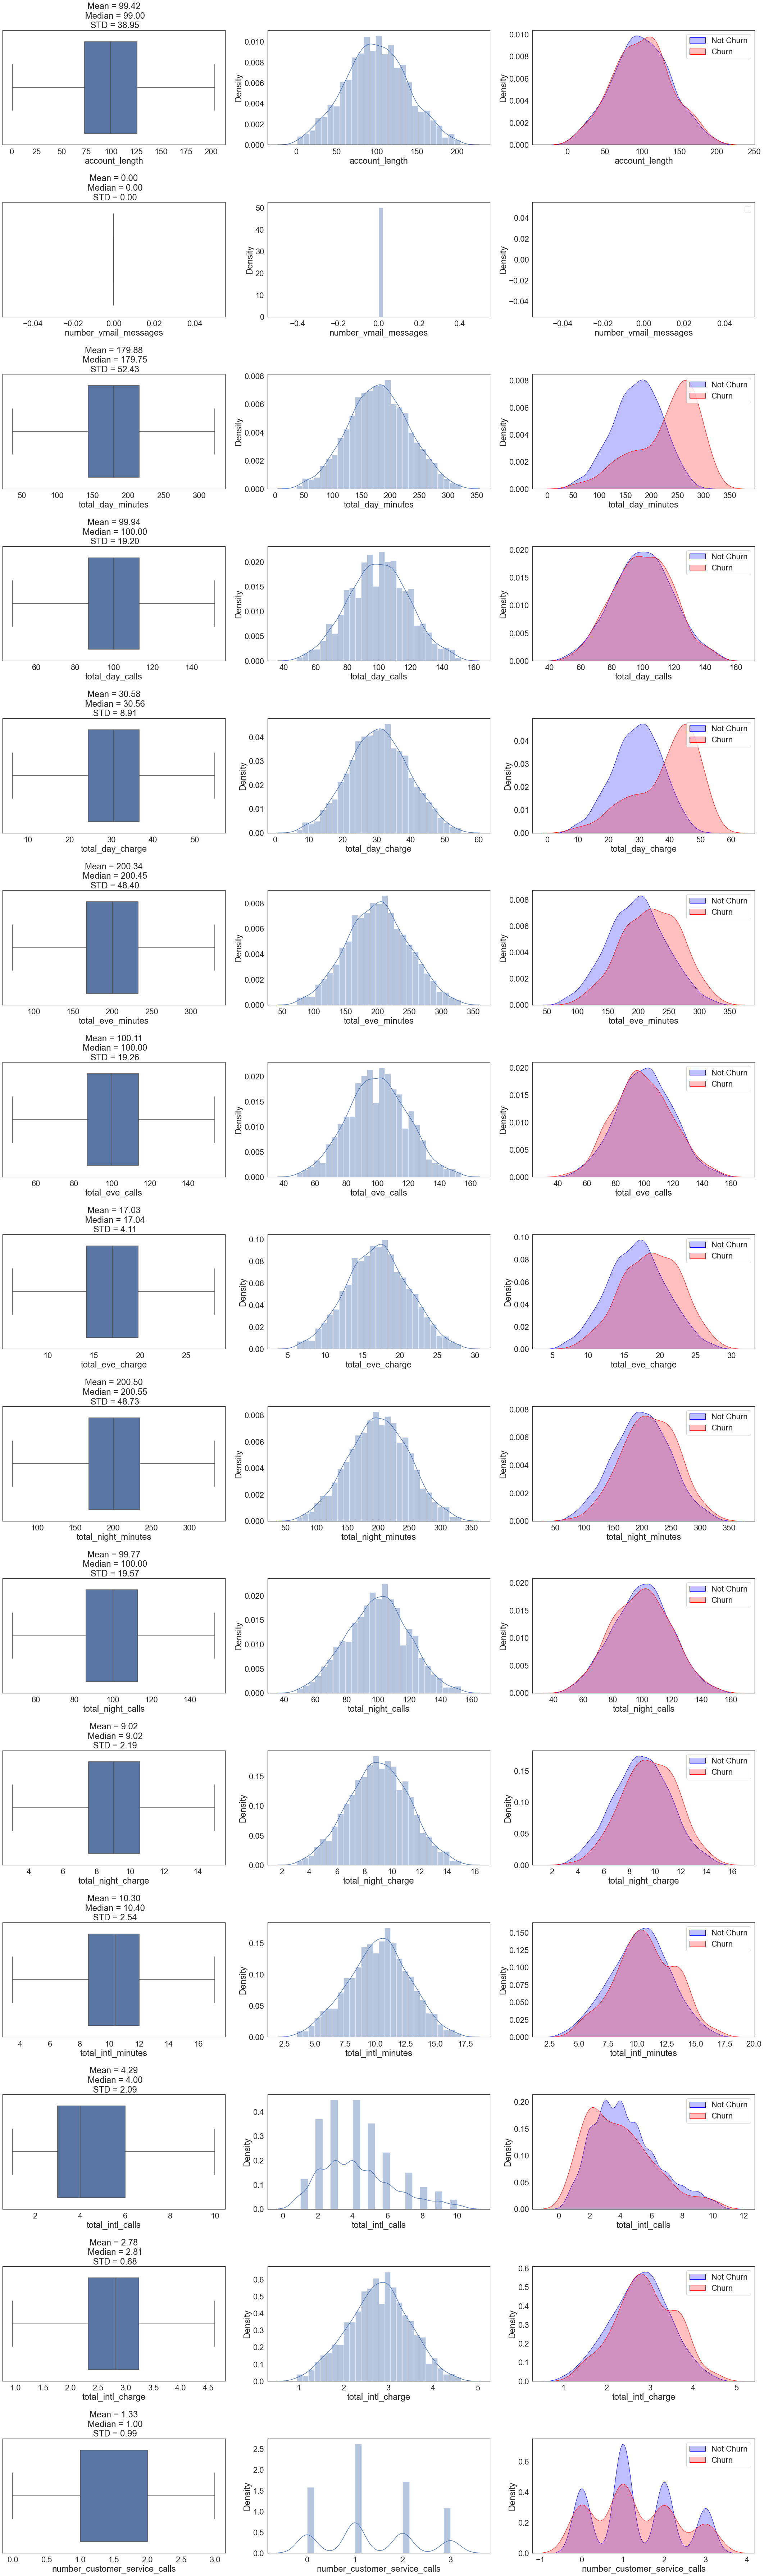

In [32]:
sns.set(style='white', font_scale = 2)
  
def observasi_num(df, features):  
    fig, axs = plt.subplots(len(df_numeric.columns), 3, figsize=(30, 100))
    for i, col in enumerate(features):
        sns.boxplot(df[col], ax = axs[i][0])
        sns.distplot(df[col], ax = axs[i][1])  
        x = sns.kdeplot(df[col][(df['churn'] == 'no')], ax = axs[i][2], color = 'Blue', shade=True) 
        x = sns.kdeplot(df[col][(df['churn'] == 'yes')], ax = axs[i][2], color = 'Red', shade=True) 
        x.legend(['Not Churn', 'Churn'], loc = 'upper right')
        axs[i][0].set_title('Mean = %.2f\n Median = %.2f\n STD = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  

observasi_num(df_cleaned, numeric_column_names)

Berdasarkan hasil visualisasi diatas, dapat dilihat bahwa data telah terbebas atau bersih dari outlier.

In [33]:
df_cleaned.head()

state  account_length      area_code international_plan voice_mail_plan  \
1     NJ             137  area_code_415                 no              no   
3     OK              75  area_code_415                yes              no   
5     MO             147  area_code_415                yes              no   
9     RI              74  area_code_415                 no              no   
10    IA             168  area_code_408                 no              no   

    number_vmail_messages  total_day_minutes  total_day_calls  \
1                       0              243.4              114   
3                       0              166.7              113   
5                       0              157.0               79   
9                       0              187.7              127   
10                      0              128.8               96   

    total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1              41.38              121.2              110             10.30   
3              28.34              148.3              122             12.61   
5              26.69              103.1               94              8.76   
9              31.91              163.4              148             13.89   
10             21.90              104.9               71              8.92   

    total_night_minutes  total_night_calls  total_night_charge  \
1                 162.6                104                7.32   
3                 186.9                121                8.41   
5                 211.8                 96                9.53   
9                 196.0                 94                8.82   
10                141.1                128                6.35   

    total_intl_minutes  total_intl_calls  total_intl_charge  \
1                 12.2                 5               3.29   
3                 10.1                 3               2.73   
5                  7.1                 6               1.92   
9                  9.1                 5               2.46   
10                11.2                 2               3.02   

    number_customer_service_calls churn  
1                               0    no  
3                               3    no  
5                               0    no  
9                               0    no  
10                              1    no

#### Melakukan mapping data pada kolom churn yang akan menjadi label menjadi numerik (0 dan 1)

Data 0 akan menjadi indikasi 'no' dan data 1 akan menjadi indikasi 'yes' pada data churn

In [34]:
binary_churn = {'no': 0, 'yes' : 1}
df_cleaned['churn'] = df_cleaned['churn'].map(binary_churn)
df_cleaned.head()

state  account_length      area_code international_plan voice_mail_plan  \
1     NJ             137  area_code_415                 no              no   
3     OK              75  area_code_415                yes              no   
5     MO             147  area_code_415                yes              no   
9     RI              74  area_code_415                 no              no   
10    IA             168  area_code_408                 no              no   

    number_vmail_messages  total_day_minutes  total_day_calls  \
1                       0              243.4              114   
3                       0              166.7              113   
5                       0              157.0               79   
9                       0              187.7              127   
10                      0              128.8               96   

    total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1              41.38              121.2              110             10.30   
3              28.34              148.3              122             12.61   
5              26.69              103.1               94              8.76   
9              31.91              163.4              148             13.89   
10             21.90              104.9               71              8.92   

    total_night_minutes  total_night_calls  total_night_charge  \
1                 162.6                104                7.32   
3                 186.9                121                8.41   
5                 211.8                 96                9.53   
9                 196.0                 94                8.82   
10                141.1                128                6.35   

    total_intl_minutes  total_intl_calls  total_intl_charge  \
1                 12.2                 5               3.29   
3                 10.1                 3               2.73   
5                  7.1                 6               1.92   
9                  9.1                 5               2.46   
10                11.2                 2               3.02   

    number_customer_service_calls  churn  
1                               0      0  
3                               3      0  
5                               0      0  
9                               0      0  
10                              1      0

#### Melakukan pemisahan feature dan label

Pada feature (X) akan dilakukan one hot encoding pada data kategorikal dengan menggunakan fungsi get_dummies dari pandas. Selain itu, pada feature (X) akan dilakukan drop kolom 'churn' yang akan menjadi label atau data Y.

In [35]:
X = pd.get_dummies(df_cleaned)
X = X.drop('churn', axis = 1)
y = df_cleaned['churn']

In [36]:
X

account_length  number_vmail_messages  total_day_minutes  \
1                137                      0              243.4   
3                 75                      0              166.7   
5                147                      0              157.0   
9                 74                      0              187.7   
10               168                      0              128.8   
...              ...                    ...                ...   
4242             150                      0              170.0   
4243             140                      0              244.7   
4245              83                      0              188.3   
4246              73                      0              177.9   
4247              75                      0              170.7   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
1                 114             41.38              121.2              110   
3                 113             28.34              148.3              122   
5                  79             26.69              103.1               94   
9                 127             31.91              163.4              148   
10                 96             21.90              104.9               71   
...               ...               ...                ...              ...   
4242              115             28.90              162.7              138   
4243              115             41.60              258.6              101   
4245               70             32.01              243.8               88   
4246               89             30.24              131.2               82   
4247              101             29.02              193.1              126   

      total_eve_charge  total_night_minutes  total_night_calls  \
1                10.30                162.6                104   
3                12.61                186.9                121   
5                 8.76                211.8                 96   
9                13.89                196.0                 94   
10                8.92                141.1                128   
...                ...                  ...                ...   
4242             13.83                267.2                 77   
4243             21.98                231.3                112   
4245             20.72                213.7                 79   
4246             11.15                186.2                 89   
4247             16.41                129.1                104   

      total_night_charge  total_intl_minutes  total_intl_calls  \
1                   7.32                12.2                 5   
3                   8.41                10.1                 3   
5                   9.53                 7.1                 6   
9                   8.82                 9.1                 5   
10                  6.35                11.2                 2   
...                  ...                 ...               ...   
4242               12.02                 8.3                 2   
4243               10.41                 7.5                 6   
4245                9.62                10.3                 6   
4246                8.38                11.5                 6   
4247                5.81                 6.9                 7   

      total_intl_charge  number_customer_service_calls  state_AK  state_AL  \
1                  3.29                              0         0         0   
3                  2.73                              3         0         0   
5                  1.92                              0         0         0   
9                  2.46                              0         0         0   
10                 3.02                              1         0         0   
...                 ...                            ...       ...       ...   
4242               2.24                              0         0         0   
4243               2.03                              1

In [37]:
y

1       0
3       0
5       0
9       0
10      0
       ..
4242    0
4243    1
4245    0
4246    0
4247    0
Name: churn, Length: 2626, dtype: int64

Kita coba untuk menampilkan statistik deskriptif dari data X

In [38]:
X.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     2626.000000                 2626.0        2626.000000   
mean        99.420792                    0.0         179.875324   
std         38.945530                    0.0          52.433618   
min          1.000000                    0.0          37.400000   
25%         73.000000                    0.0         143.800000   
50%         99.000000                    0.0         179.750000   
75%        126.000000                    0.0         215.850000   
max        204.000000                    0.0         322.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      2626.000000       2626.000000        2626.000000      2626.000000   
mean         99.938309         30.579402         200.344402       100.114623   
std          19.204623          8.913625          48.401205        19.261573   
min          48.000000          6.360000          73.200000        48.000000   
25%          87.000000         24.450000         167.100000        87.000000   
50%         100.000000         30.560000         200.450000       100.000000   
75%         113.000000         36.692500         232.900000       114.000000   
max         152.000000         54.830000         330.600000       154.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       2626.000000          2626.000000        2626.000000   
mean          17.029478           200.503123          99.771516   
std            4.114131            48.733601          19.570988   
min            6.220000            67.700000          48.000000   
25%           14.200000           167.625000          86.000000   
50%           17.035000           200.550000         100.000000   
75%           19.800000           234.975000         113.000000   
max           28.100000           333.500000         153.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         2626.000000         2626.000000       2626.000000   
mean             9.022772           10.296078          4.286367   
std              2.193073            2.536414          2.090218   
min              3.050000            3.500000          1.000000   
25%              7.542500            8.600000          3.000000   
50%              9.025000           10.400000          4.000000   
75%             10.577500           12.000000          6.000000   
max             15.010000           17.100000         10.000000   

       total_intl_charge  number_customer_service_calls     state_AK  \
count        2626.000000                    2626.000000  2626.000000   
mean            2.780453                       1.327494     0.014471   
std             0.684801                       0.990691     0.119443   
min             0.950000                       0.000000     0.000000   
25%             2.320000                       1.000000     0.000000   
50%             2.810000                       1.000000     0.000000   
75%             3.240000                       2.000000     0.000000   
max             4.620000                       3.000000     1.000000   

          state_AL     state_AR     state_AZ     state_CA     state_CO  \
count  2626.000000  2626.000000  2626.000000  2626.000000  2626.000000   
mean      0.023991     0.013709     0.014851     0.010663     0.018279   
std       0.153050     0.116303     0.120981     0.102727     0.133983   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          state_CT     state_DC     state_DE     state_FL     state_GA  \
count  2626.000000  2626.000000  2626.000000  2626.000000  2626.000000   
mean      

#### Melakukan Scalling data menggunakan MinMax Scaller

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_max_scaler = MinMaxScaler()

In [41]:
X_scaled = min_max_scaler.fit_transform(X)

In [42]:
X_scaled

array([[0.66995074, 0.        , 0.72255349, ..., 0.        , 1.        ,
        0.        ],
       [0.36453202, 0.        , 0.45352508, ..., 1.        , 1.        ,
        0.        ],
       [0.71921182, 0.        , 0.41950193, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.40394089, 0.        , 0.52928797, ..., 0.        , 1.        ,
        0.        ],
       [0.3546798 , 0.        , 0.49280954, ..., 0.        , 1.        ,
        0.        ],
       [0.36453202, 0.        , 0.46755524, ..., 0.        , 1.        ,
        0.        ]])

In [43]:
X_scaled.shape

(2626, 73)

In [44]:
y.shape

(2626,)

### Split Data Train and Data Test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (2100, 73)
y_train shape : (2100,)
X_test shape : (526, 73)
y_test shape : (526,)


# 3. Modelling

In [48]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 Score", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F1 Score"], ascending = False)
    return results

In [49]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#knn
classifier3 = KNeighborsClassifier(metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()
classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)

#Voting Classifier
classifier10 = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()),
                                            ('abc', AdaBoostClassifier())], voting='soft')
classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)

In [50]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")
vc = model_evaluation(y_test, y_pred10, "Voting Classifier")

In [51]:
eval_ =lr.append(svm).append(knn).append(k_svm).append(nb).append(dt).append(rf).append(ab).append(gb).append(vc).sort_values(["F1 Score"], ascending = False).reset_index().drop(columns = "index")
eval_

C:\Users\laode\AppData\Local\Temp\ipykernel_38156\735192599.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_ =lr.append(svm).append(knn).append(k_svm).append(nb).append(dt).append(rf).append(ab).append(gb).append(vc).sort_values(["F1 Score"], ascending = False).reset_index().drop(columns = "index")
C:\Users\laode\AppData\Local\Temp\ipykernel_38156\735192599.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_ =lr.append(svm).append(knn).append(k_svm).append(nb).append(dt).append(rf).append(ab).append(gb).append(vc).sort_values(["F1 Score"], ascending = False).reset_index().drop(columns = "index")
C:\Users\laode\AppData\Local\Temp\ipykernel_38156\735192599.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eva

Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0         Random Forest  0.948669   0.897436  0.603448  0.721649  0.645756
1     Voting Classifier  0.948669   0.918919  0.586207  0.715789  0.631970
2        Gradient Boost  0.944867   0.853659  0.603448  0.707071  0.641026
3         Decision Tree  0.923954   0.655172  0.655172  0.655172  0.655172
4          SVM (Linear)  0.923954   0.764706  0.448276  0.565217  0.488722
5              Adaboost  0.918251   0.702703  0.448276  0.547368  0.483271
6   Logistic Regression  0.918251   0.714286  0.431034  0.537634  0.468165
7            Kernel SVM  0.914449   0.882353  0.258621  0.400000  0.301205
8           Naive Bayes  0.300380   0.125604  0.896552  0.220339  0.402477
9  K-Nearest Neighbours  0.884030   0.421053  0.137931  0.207792  0.159363

Berdasarkan sorting model dengan nilai F1 Score, maka model yang dipilih adalah Random Forest. Alasan kenapa memakai nilai F1 Score sebagai acuan karena data yang digunakan memiliki target class yang imbalanced